Trabalho Rodolfo Sato Junior e Akilles Yuri Nakabori

In [ ]:
%%capture
!pip install pydotplus
!pip install dtreeviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [39]:
basetreino = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Bases/Atividade 3 - Bases.xlsx", sheet_name=0)
del basetreino['ID_usuário']
basetreino = basetreino.head(473)
basetreino

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter
3,M,49,C,Esporádico,Sim,Sim,Sim,Sim,Website,Early Adopter
4,M,29,S,Esporádico,Sim,Sim,Sim,Não,Website,Late Majority
...,...,...,...,...,...,...,...,...,...,...
468,F,37,C,Esporádico,Sim,Não,Sim,Sim,Website,Early Adopter
469,M,33,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito,Innovator
470,F,23,S,Esporádico,Sim,Sim,Sim,Sim,Website,Early Majority
471,M,35,C,Frequênte,Sim,Não,Sim,Não,Transferência,Innovator


In [40]:
baseteste = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Bases/Atividade 3 - Bases.xlsx", sheet_name=1)
del baseteste['ID_usuário']
baseteste

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,M,57,S,Intermitente,Sim,Sim,Sim,Sim,Transferência
1,F,51,C,Intermitente,Sim,Sim,Não,Não,Transferência
2,M,41,C,Esporádico,Sim,Sim,Sim,Não,Website
3,M,66,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito
4,F,31,S,Esporádico,Sim,Não,Sim,Não,Website
...,...,...,...,...,...,...,...,...,...
468,M,60,S,Esporádico,Sim,Não,Sim,Sim,Transferência
469,F,24,S,Esporádico,Sim,Não,Não,Não,Cartão de crédito
470,M,23,C,Intermitente,Sim,Sim,Sim,Sim,Website
471,F,36,S,Esporádico,Sim,Não,Sim,Não,Transferência


In [41]:
print("\nDimensões: {0}".format(basetreino.shape))
print("\nCampos: {0}".format(basetreino.keys()))
print("\n",basetreino.describe(), sep='\n')


Dimensões: (473, 10)

Campos: Index(['Gênero', 'Idade', 'Estado_civil', 'Atividade_no_site',
       'Pesquisou_eletronicos_12m', 'Comprou_eletronicos_12m',
       'Pesquisou_mídia_digital_18m', 'Comprou_mídia_digital_18m',
       'Forma_pagamento', 'Adoção_eReader'],
      dtype='object')


            Idade
count  473.000000
mean    42.665962
std     13.878500
min     16.000000
25%     32.000000
50%     44.000000
75%     54.000000
max     66.000000


In [42]:
x_dict_treino = basetreino.iloc[:,basetreino.columns != 'Adoção_eReader'].T.to_dict().values()
x_dict_treino

dict_values([{'Gênero': 'M', 'Idade': 61, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'M', 'Idade': 27, 'Estado_civil': 'C', 'Atividade_no_site': 'Intermitente', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Não', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'F', 'Idade': 29, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Sim', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'M', 'Idade': 49, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': '

In [43]:
x_dict_teste = baseteste.T.to_dict().values()
x_dict_teste

dict_values([{'Gênero': 'M', 'Idade': 57, 'Estado_civil': 'S', 'Atividade_no_site': 'Intermitente', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Sim', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'F', 'Idade': 51, 'Estado_civil': 'C', 'Atividade_no_site': 'Intermitente', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Não', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Gênero': 'M', 'Idade': 41, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Website'}, {'Gênero': 'M', 'Idade': 66, 'Estado_civil': 'S', 'Atividade_no_site': 'Intermitente', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Si

In [44]:
vect = DictVectorizer(sparse=False)
x_treino = vect.fit_transform(x_dict_treino)
x_treino

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [45]:
x_teste = vect.fit_transform(x_dict_teste)
x_teste

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [46]:
le = LabelEncoder()
y_treino = le.fit_transform(basetreino['Adoção_eReader'])
y_treino

array([3, 2, 0, 0, 3, 1, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3, 0, 0, 1, 3, 0, 1,
       3, 3, 3, 2, 0, 0, 3, 0, 0, 1, 1, 1, 3, 2, 1, 3, 2, 3, 0, 3, 1, 3,
       2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 0, 3, 0,
       1, 1, 0, 0, 0, 3, 1, 3, 1, 1, 1, 3, 1, 0, 3, 1, 2, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 3, 2, 2, 0, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 0, 1, 0, 1, 2, 1, 0, 0, 2, 3, 2, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 3, 3, 1, 0, 2, 0, 1, 0, 1, 1, 3, 2, 1, 1, 3,
       2, 3, 1, 2, 1, 0, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0,
       0, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 1, 3, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 3, 2, 1,
       3, 3, 3, 3, 0, 1, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 1,
       3, 2, 1, 3, 2, 0, 3, 0, 0, 3, 0, 3, 2, 3, 1, 0, 1, 0, 1, 0, 2, 2,
       1, 3, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3, 0,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2,

In [64]:
arvore = DecisionTreeClassifier(random_state=10, criterion='gini', max_depth=10, )
arvore = arvore.fit(x_treino, y_treino)
arvore.predict(x_treino)

array([3, 2, 0, 0, 3, 1, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3, 0, 0, 1, 3, 0, 1,
       3, 3, 3, 2, 0, 0, 3, 1, 0, 1, 1, 1, 3, 2, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 0, 3, 0,
       1, 1, 0, 0, 0, 3, 1, 3, 1, 1, 1, 3, 1, 0, 3, 1, 2, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 3, 2, 2, 0, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 3, 0, 1, 0, 1, 2, 1, 0, 0, 2, 3, 2, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 3, 3, 1, 0, 2, 0, 1, 0, 1, 1, 3, 2, 1, 1, 3,
       2, 3, 1, 2, 1, 0, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0,
       0, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 1, 3, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 3, 2, 1,
       3, 3, 3, 0, 0, 1, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 1,
       3, 0, 1, 3, 2, 0, 3, 0, 0, 3, 0, 3, 2, 3, 1, 0, 1, 1, 1, 0, 2, 2,
       1, 3, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3, 0,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2,

In [65]:
print("Acurácia (base de treinamento):", arvore.score(x_treino, y_treino) * 100)

Acurácia (base de treinamento): 97.46300211416491


In [66]:
y_pred = arvore.predict(x_teste)
y_pred

array([0, 0, 3, 2, 3, 1, 3, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 3, 0, 1, 0,
       0, 3, 1, 3, 2, 0, 0, 0, 2, 0, 0, 3, 3, 1, 0, 1, 3, 3, 0, 0, 1, 0,
       0, 0, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 3, 2, 3, 3, 3, 3, 0, 1, 1, 1,
       3, 3, 3, 0, 0, 2, 3, 3, 1, 1, 3, 3, 0, 2, 3, 3, 3, 0, 0, 0, 3, 0,
       1, 0, 0, 0, 0, 3, 0, 1, 2, 3, 3, 2, 3, 0, 3, 2, 2, 3, 0, 0, 3, 1,
       3, 1, 2, 1, 0, 1, 0, 3, 3, 1, 0, 0, 0, 0, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 0, 3, 3, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 2, 1, 3, 0, 3, 0, 0, 0, 1, 2, 1, 0, 1, 3, 0,
       0, 0, 3, 0, 3, 3, 3, 0, 1, 0, 0, 3, 0, 3, 1, 3, 1, 3, 2, 0, 0, 1,
       0, 0, 0, 3, 1, 3, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 3, 2, 2, 0, 0, 3,
       3, 1, 0, 1, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 3, 1, 3,
       3, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 1, 3, 2, 1, 1, 0, 2, 0, 0, 2, 3,
       3, 2, 3, 0, 2, 1, 3, 3, 3, 0, 1, 2, 0, 3, 0, 0, 2, 3, 2, 0, 1, 1,
       0, 3, 0, 2, 3, 0, 0, 1, 2, 3, 0, 1, 1, 1, 2,

In [67]:
y_treino

array([3, 2, 0, 0, 3, 1, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3, 0, 0, 1, 3, 0, 1,
       3, 3, 3, 2, 0, 0, 3, 0, 0, 1, 1, 1, 3, 2, 1, 3, 2, 3, 0, 3, 1, 3,
       2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 0, 3, 0,
       1, 1, 0, 0, 0, 3, 1, 3, 1, 1, 1, 3, 1, 0, 3, 1, 2, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 3, 2, 2, 0, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 0, 1, 0, 1, 2, 1, 0, 0, 2, 3, 2, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 3, 3, 1, 0, 2, 0, 1, 0, 1, 1, 3, 2, 1, 1, 3,
       2, 3, 1, 2, 1, 0, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0,
       0, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 1, 3, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 3, 2, 1,
       3, 3, 3, 3, 0, 1, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 1,
       3, 2, 1, 3, 2, 0, 3, 0, 0, 3, 0, 3, 2, 3, 1, 0, 1, 0, 1, 0, 2, 2,
       1, 3, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3, 0,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2,

In [68]:
print("Acurácia de previsão:", accuracy_score(y_treino, y_pred))

Acurácia de previsão: 0.28964059196617337


In [87]:
arvore = DecisionTreeClassifier(random_state=10321, criterion='entropy', max_depth=10,  min_samples_split=10)
arvore = arvore.fit(x_treino, y_treino)

y_pred = arvore.predict(x_teste)
y_pred

print("Acurácia de previsão:", accuracy_score(y_treino, y_pred))

Acurácia de previsão: 0.2938689217758985


In [93]:
print(classification_report(y_treino, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40       152
           1       0.30      0.25      0.27       130
           2       0.16      0.15      0.15        73
           3       0.25      0.27      0.26       118

    accuracy                           0.29       473
   macro avg       0.27      0.27      0.27       473
weighted avg       0.29      0.29      0.29       473



### Exibição da árvore de decisão

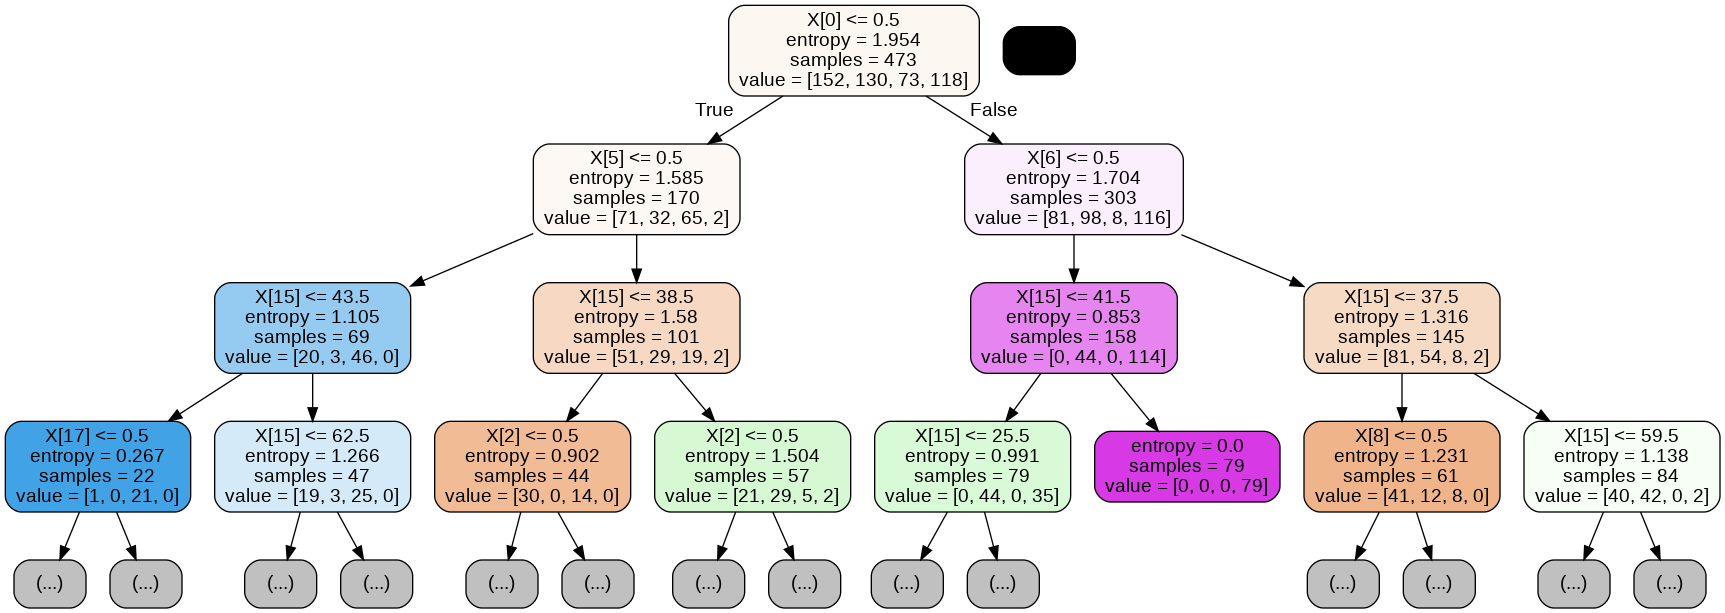

In [90]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(arvore, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                max_depth=3)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
